# Financial Support to Ukraine | EDA Analysis - 2024 

EDA Report : Commitments to Ukraine

#### Background

This report presents an exploratory data analysis (EDA) of a dataset containing financial, humanitarian, and military commitments made to Ukraine by various countries. The dataset distinguishes between contributions from EU and non-EU member countries and includes multiple financial metrics and commitments. The primary goal is to identify notable differences in the allocation and commitment patterns between EU and non-EU member countries.

#### Objectives

- To compare the financial allocations and commitments between EU and non-EU member countries.
- To evaluate the contributions from EU and non-EU member countries.
- To determine if there is a significant difference in the mean financial aid allocations between EU and non-EU member countries.
- To visualize the correlation between different types of allocations and commitments.

#### Key Findings 

- Distribution of Allocations: The support to Ukraine varies widely across financial, humanitarian, and military allocations.
- Significant Difference: T-test results indicate only 'Financial commitments($ billion)' show a significant difference in the mean of financial aid allocations between EU members and non-EU members, across all categories.
- Outliers: Specific countries have been identified as outliers based on their financial allocations.
- Correlations: Significant correlations were found between certain types of allocations and commitments.

## Importing Libraries

- `pandas` for data manipulation
- `seaborn` for data visualization
- `matplotlib.pyplot` for plotting 
- `scipy.stats` for probability more specifically we will use t-test

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

## Importing Dataset

In [94]:
data = pd.read_csv('Ukraine Financial Aid 2024 (Russia-Ukraine War)/Financial Allocations.csv')
datb = pd.read_csv('Ukraine Financial Aid 2024 (Russia-Ukraine War)/Financial Commitments.csv')

In [95]:
data.head(5)

,Country,EU member,Financial allocations($ billion),Humanitarian allocations($ billion),Military allocations($ billion),Total bilateral allocations($ billion),Share in EU allocations($ billion)
0,Australia,0,0.728552,0.069499,0.003587,0.801638,0.140745
1,Austria,1,0.191309,0.053399,0.923287,1.167995,0.000000
2,Belgium,1,0.000000,0.001041,0.262288,0.263330,0.120810
3,Bulgaria,1,3.695839,0.397457,2.068583,6.161879,0.052599
4,Canada,0,0.000000,0.086783,0.203566,0.290349,0.486123


In [96]:
datb.head(5)

,Country,EU member,GDP in 2021($ billion),Financial commitments($ billion),Humanitarian commitments($ billion),Military commitments($ billion),Total bilateral commitments($ billion),Share in EU commitments($ billion),Specific weapons and equipment($ billion),Financial commitments with military purpose($ billion),Total bilateral commitments of short term($ billion)
0,Australia,0,1552.667363,0.000000,0.087226,0.549340,0.636566,0.000000,0.003587,0.000000,0.859922
1,Austria,1,480.368404,0.728552,0.127783,0.003587,0.859922,2.381462,0.340981,1.349000,2.101827
2,Belgium,1,594.104177,0.491301,0.193752,1.689981,2.375034,3.131455,0.262288,0.000000,0.263330
3,Bulgaria,1,84.056313,0.000000,0.001041,0.262288,0.263330,0.393109,1.568800,1.416861,7.089255
4,Canada,0,1988.336332,4.887591,0.407756,2.985661,8.281008,0.000000,0.066801,0.136765,0.295706


In [97]:
# Given that the two datasets represent similar metrics, we will proceed with merging them.
data = pd.merge(data, datb, on=['Country','EU member'])

In [98]:
# Identify data types
print(data.dtypes)

Country                                                    object
EU member                                                   int64
Financial allocations($ billion)                          float64
Humanitarian allocations($ billion)                       float64
Military allocations($ billion)                           float64
Total bilateral allocations($ billion)                    float64
Share in EU allocations($ billion)                        float64
GDP in 2021($ billion)                                    float64
Financial commitments($ billion)                          float64
Humanitarian commitments($ billion)                       float64
Military commitments($ billion)                           float64
Total bilateral commitments($ billion)                    float64
Share in EU commitments($ billion)                        float64
Specific weapons and equipment($ billion)                 float64
Financial commitments with military purpose($ billion)    float64
Total bila

In [99]:
# To verify the accuracy of the dataset, I sorted the data by Financial Commitments ($ billion) in descending order.
# The resulting order aligns with my expectation, suggesting that the dataset is accurate and likely up-to-date. 
# With this initial validation complete, I can proceed confidently with further analysis.
data.sort_values(by='Total bilateral commitments($ billion)', ascending=False).head(5)

,Country,EU member,Financial allocations($ billion),Humanitarian allocations($ billion),Military allocations($ billion),Total bilateral allocations($ billion),Share in EU allocations($ billion),GDP in 2021($ billion),Financial commitments($ billion),Humanitarian commitments($ billion),Military commitments($ billion),Total bilateral commitments($ billion),Share in EU commitments($ billion),Specific weapons and equipment($ billion),Financial commitments with military purpose($ billion),Total bilateral commitments of short term($ billion)
37,United States,0,0.000000,0.002284,0.000000,0.002284,0.000000,23315.080560,26.370000,2.706826,46.325600,75.402426,0.000000,0.000000,0.000000,0.002284
12,Germany,1,0.000000,0.000000,0.143237,0.143237,0.000000,4259.934912,1.507460,3.263849,19.940181,24.711490,18.826294,0.143237,0.000000,0.143237
36,United Kingdom,0,23.000000,2.706826,46.152000,71.858826,0.000000,3131.377763,6.510938,0.626919,9.881777,17.019635,0.000000,46.325600,0.000000,75.402426
8,Denmark,1,0.000000,0.052539,0.524732,0.577272,0.556736,398.303273,0.137112,0.261334,9.003001,9.401447,1.891753,0.953292,0.000000,0.708169
18,Japan,0,0.043927,0.008164,0.403534,0.455625,0.093190,4940.877781,6.094550,2.199015,0.069452,8.363017,0.000000,0.397105,0.006428,0.453482


### Data Cleaning
The dataset was examined for missing values. Rows with entirely missing data were removed to ensure the dataset is ready for futher processing.

In [100]:
print(data.isnull().sum())
data.dropna(inplace=True)
data.isnull().sum()

Country                                                   0
EU member                                                 0
Financial allocations($ billion)                          1
Humanitarian allocations($ billion)                       1
Military allocations($ billion)                           1
Total bilateral allocations($ billion)                    1
Share in EU allocations($ billion)                        3
GDP in 2021($ billion)                                    0
Financial commitments($ billion)                          0
Humanitarian commitments($ billion)                       0
Military commitments($ billion)                           0
Total bilateral commitments($ billion)                    0
Share in EU commitments($ billion)                        0
Specific weapons and equipment($ billion)                 1
Financial commitments with military purpose($ billion)    1
Total bilateral commitments of short term($ billion)      1
dtype: int64


Country                                                   0
EU member                                                 0
Financial allocations($ billion)                          0
Humanitarian allocations($ billion)                       0
Military allocations($ billion)                           0
Total bilateral allocations($ billion)                    0
Share in EU allocations($ billion)                        0
GDP in 2021($ billion)                                    0
Financial commitments($ billion)                          0
Humanitarian commitments($ billion)                       0
Military commitments($ billion)                           0
Total bilateral commitments($ billion)                    0
Share in EU commitments($ billion)                        0
Specific weapons and equipment($ billion)                 0
Financial commitments with military purpose($ billion)    0
Total bilateral commitments of short term($ billion)      0
dtype: int64

In [101]:
# Creating new dataframe to focus on specific numeric features relevant to financial, humanitarian, and military allocations and commitments.

numericFeatures = [
    'Financial allocations($ billion)',
    'Humanitarian allocations($ billion)',
    'Military allocations($ billion)',
    'Total bilateral allocations($ billion)',
    'Share in EU allocations($ billion)',
    'GDP in 2021($ billion)',
    'Financial commitments($ billion)',
    'Humanitarian commitments($ billion)',
    'Military commitments($ billion)',
    'Total bilateral commitments($ billion)',
    'Share in EU commitments($ billion)',
    'Specific weapons and equipment($ billion)',
    'Financial commitments with military purpose($ billion)',
    'Total bilateral commitments of short term($ billion)'
]

financialAllocation = [
    'Financial allocations($ billion)',
    'Humanitarian allocations($ billion)',
    'Military allocations($ billion)',
    'Total bilateral allocations($ billion)',
    'Share in EU allocations($ billion)',
    'Financial commitments($ billion)',
    'Humanitarian commitments($ billion)',
    'Military commitments($ billion)',
    'Total bilateral commitments($ billion)',
    'Share in EU commitments($ billion)',
    'Specific weapons and equipment($ billion)',
    'Financial commitments with military purpose($ billion)',
    'Total bilateral commitments of short term($ billion)'
]

## Data Visualization

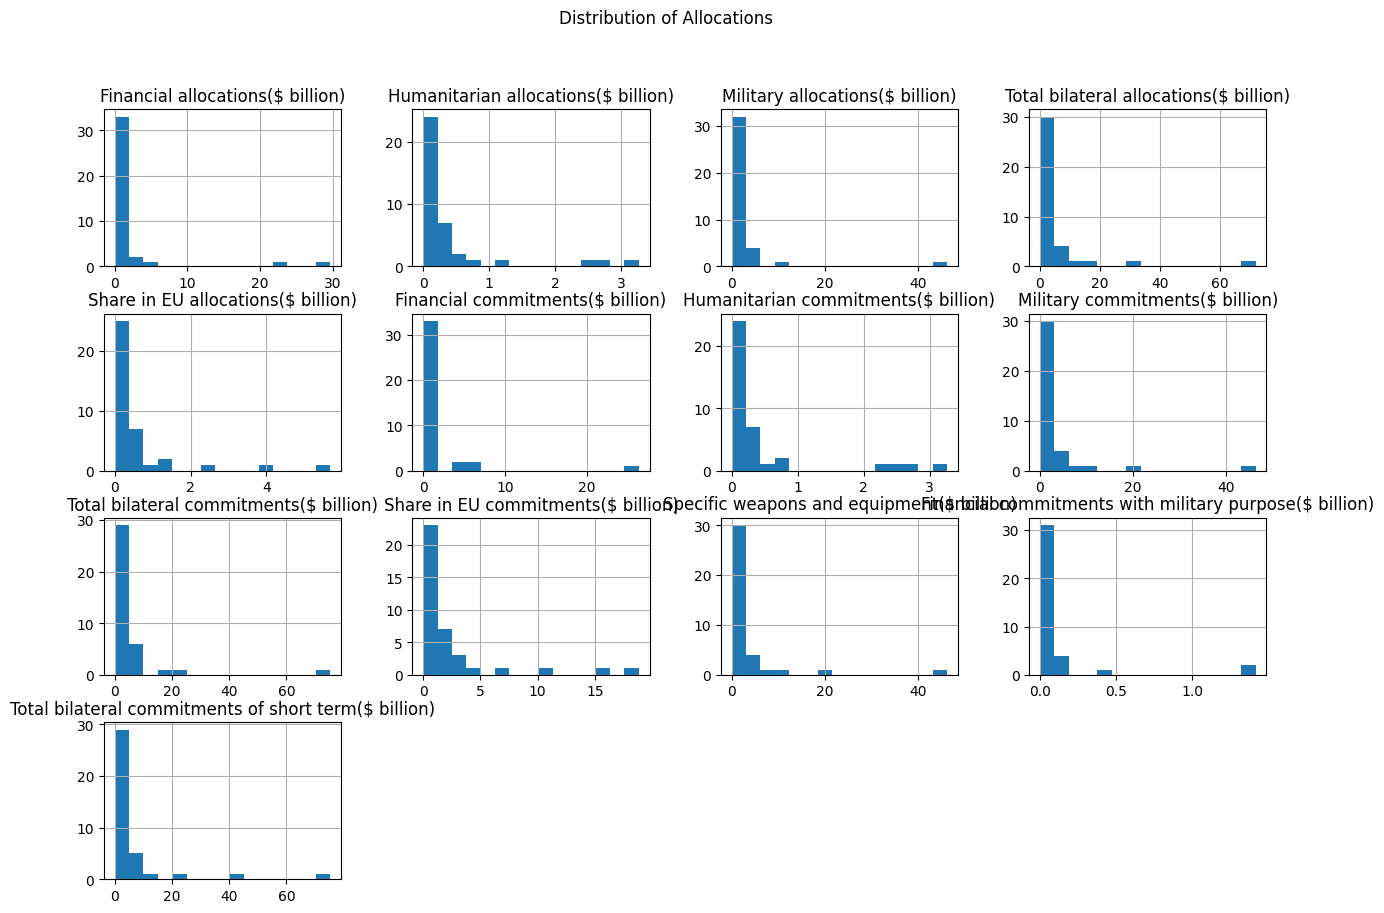

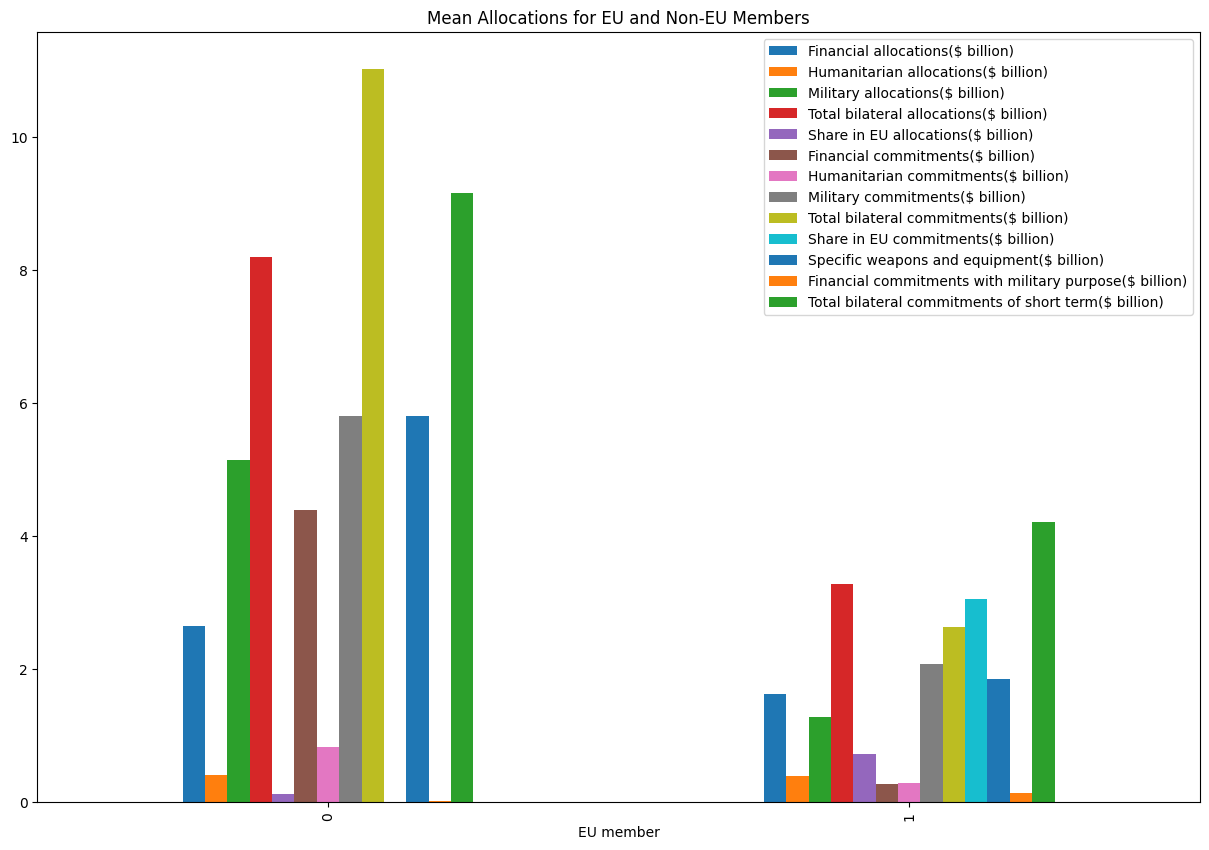

In [102]:
# Histograms to visualize the distribution of allocations.

data[financialAllocation].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Allocations')
plt.show()

# Bar plots were used to compare the mean allocations between EU and non-EU member countries.
meanAllocations = data.groupby('EU member')[financialAllocation].mean().reset_index()
meanAllocations.plot(x='EU member', kind='bar', figsize=(15, 10))
plt.title('Mean Allocations for EU and Non-EU Members')
plt.show()


### Hypothesis Testing

A two-sample t-test was conducted to investigate whether there is a significant difference in the mean financial aid allocations between EU member countries and non-EU member countries.


##### Hypotheses

$H\_0: \mu_\text{EU} = \mu_\text{nonEU}$

$H\_1: \mu_\text{EU} > \mu_\text{nonEU}$

α `0.05`
<br></br>

The t-statistic formula :

$$t = \frac{\bar{X}\_1 - \bar{X}\_2}{\sqrt{\frac{s\_1^2}{n\_1} + \frac{s\_2^2}{n\_2}}}$$

##### Results 
Across all the categories analyzed, the p-values are greater than the significance level of 0.05. Therefore, $H_0$, which states that there is no significant difference in financial aids between EU members and non-EU members, is not rejected. Therefore, there is no difference in the mean of financial allocations between EU and non-EU members across categories contained in the dataset.

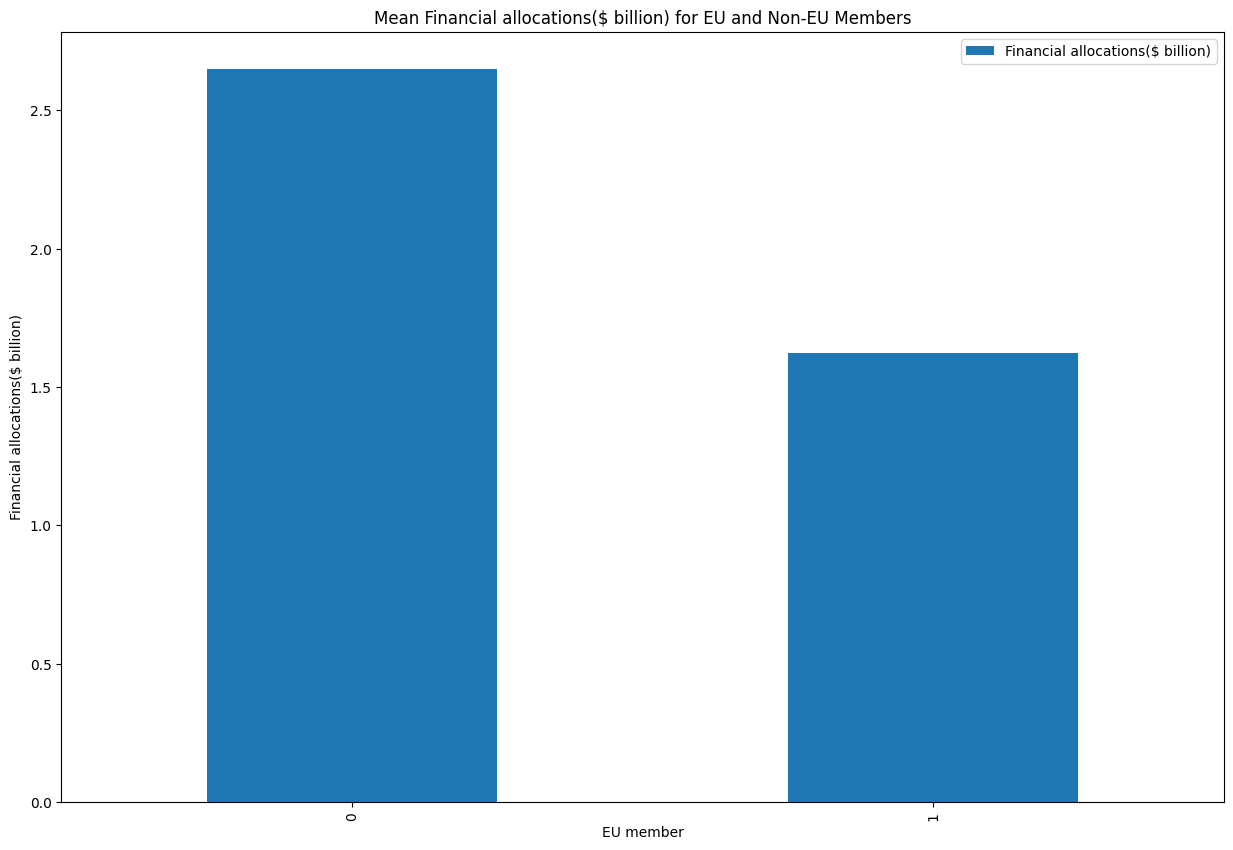

Financial allocations($ billion)
T-statistic: -0.4747081541381069
P-value: 0.6378622077188352
H0 is not rejected. The statistical analysis did not provide sufficient evidence to conclude that there is a significant difference in financial aid between EU members and non-EU members.


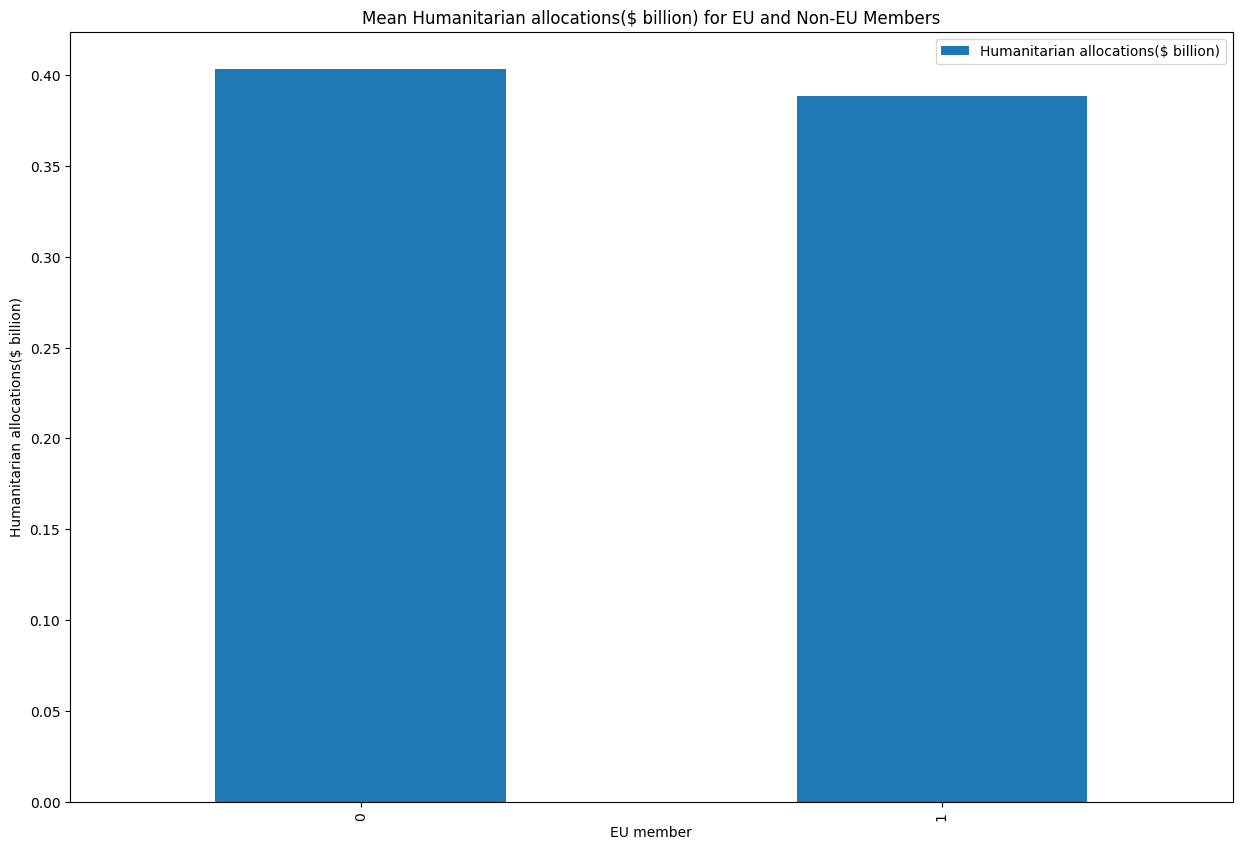

Humanitarian allocations($ billion)
T-statistic: -0.05384505986599648
P-value: 0.9573563136632732
H0 is not rejected. The statistical analysis did not provide sufficient evidence to conclude that there is a significant difference in financial aid between EU members and non-EU members.


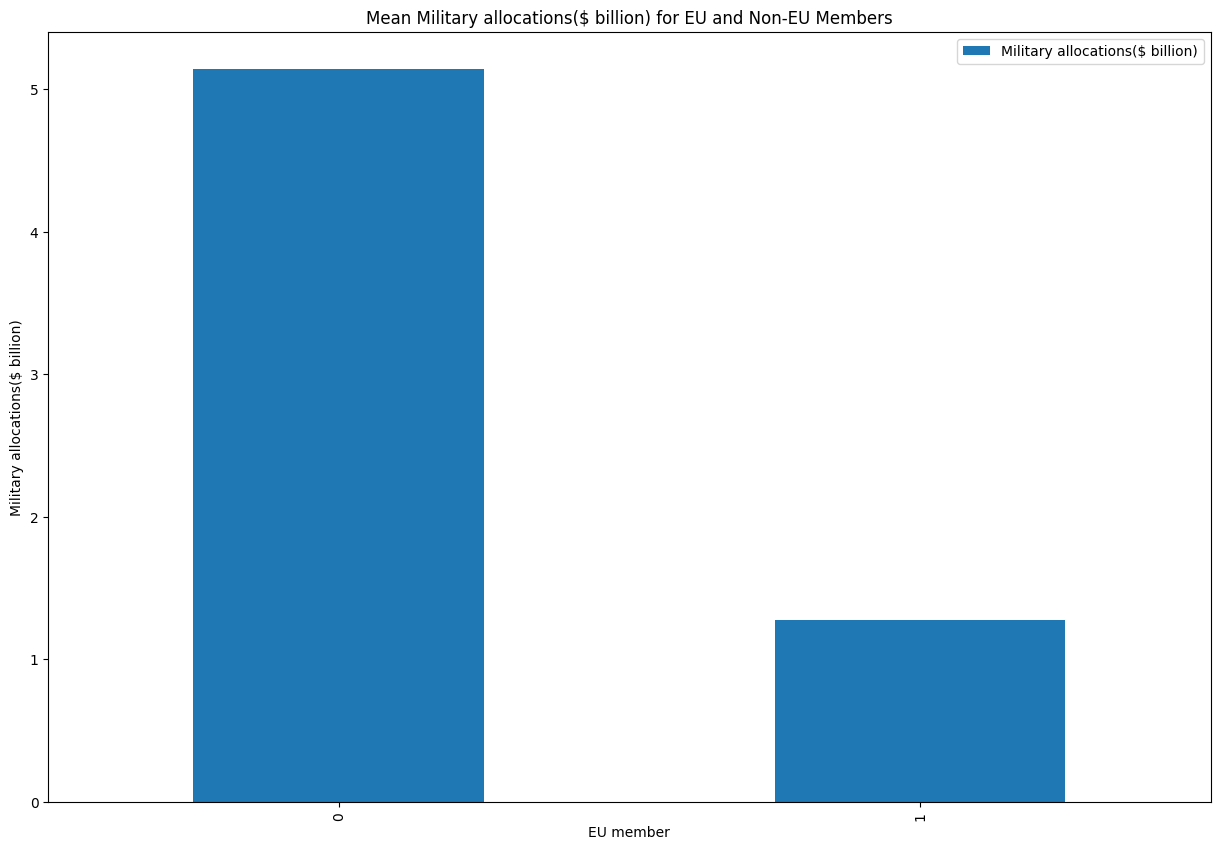

Military allocations($ billion)
T-statistic: -1.4436683093053682
P-value: 0.1574789068775523
H0 is not rejected. The statistical analysis did not provide sufficient evidence to conclude that there is a significant difference in financial aid between EU members and non-EU members.


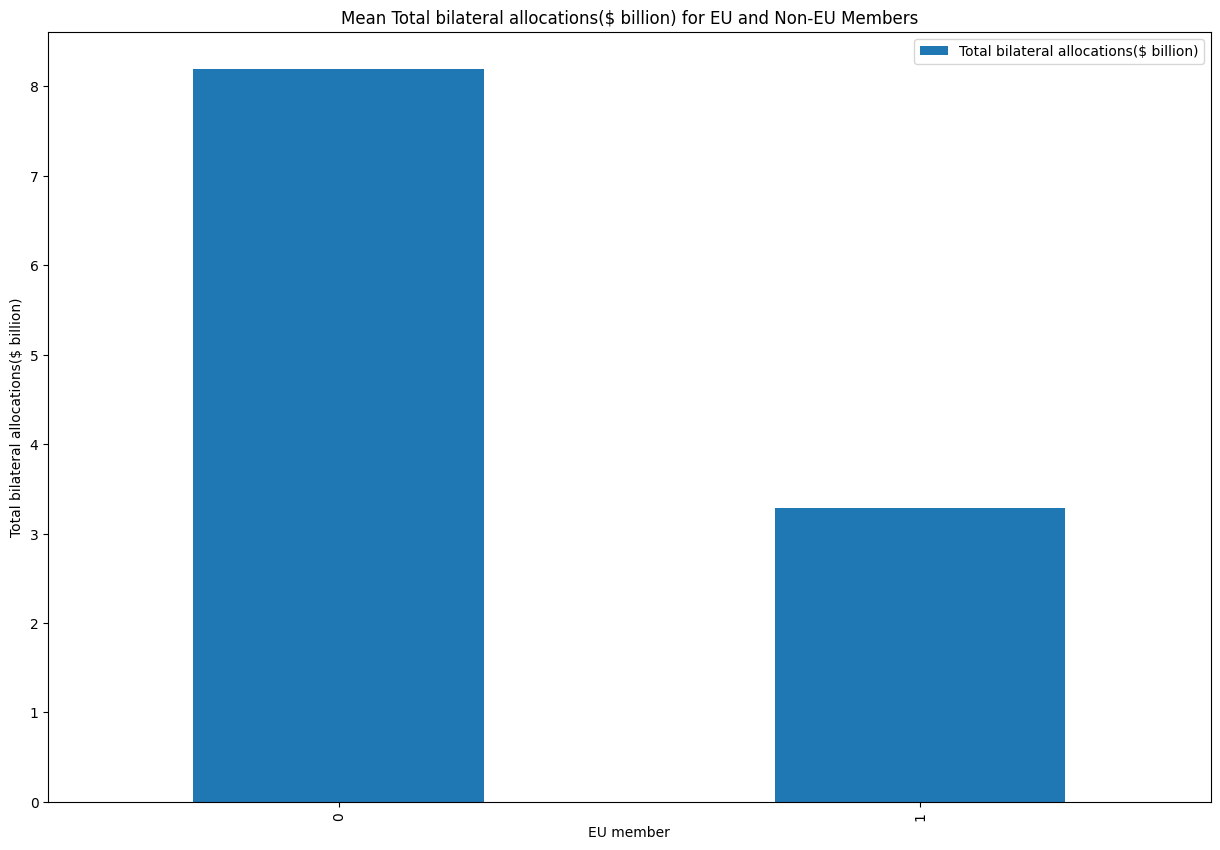

Total bilateral allocations($ billion)
T-statistic: -1.0914578978399305
P-value: 0.28232261657480606
H0 is not rejected. The statistical analysis did not provide sufficient evidence to conclude that there is a significant difference in financial aid between EU members and non-EU members.


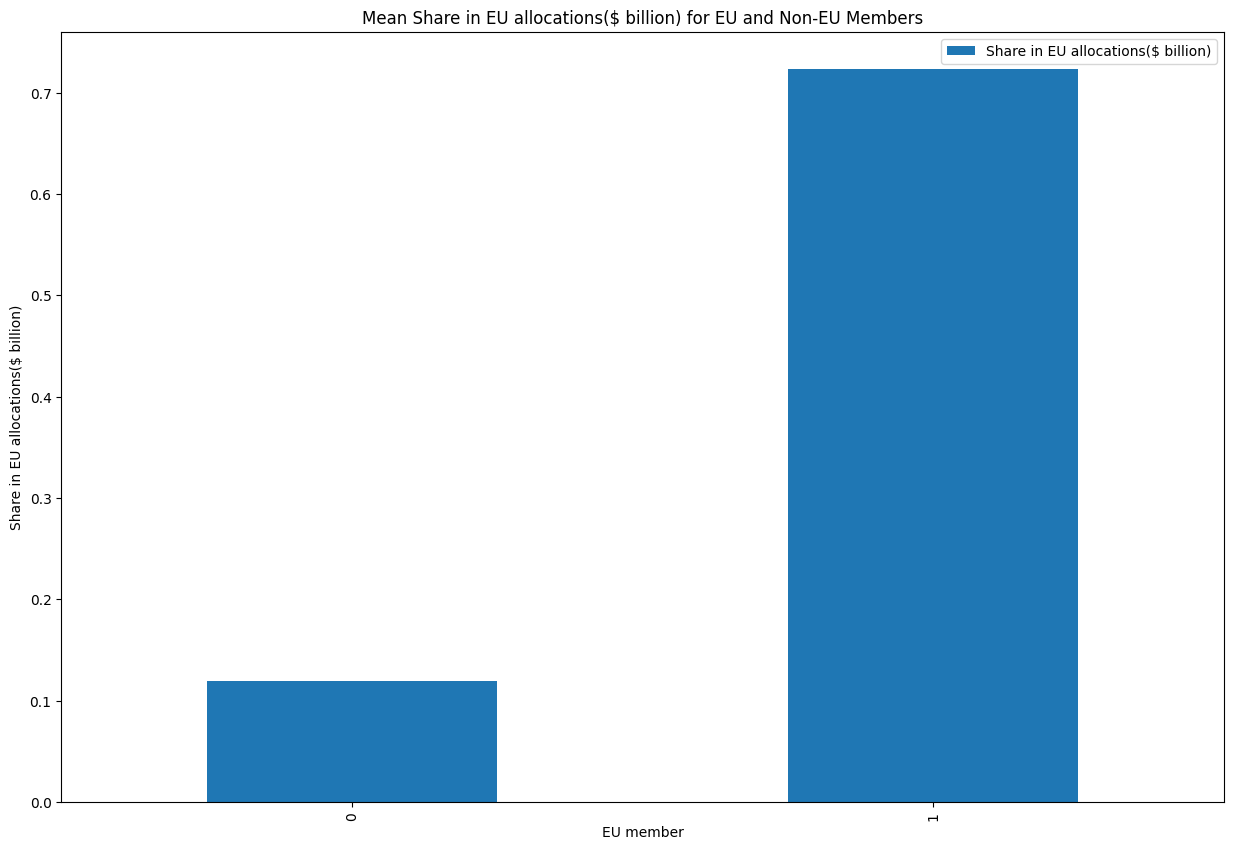

Share in EU allocations($ billion)
T-statistic: 1.4722931365402503
P-value: 0.14963108520788773
H0 is not rejected. The statistical analysis did not provide sufficient evidence to conclude that there is a significant difference in financial aid between EU members and non-EU members.


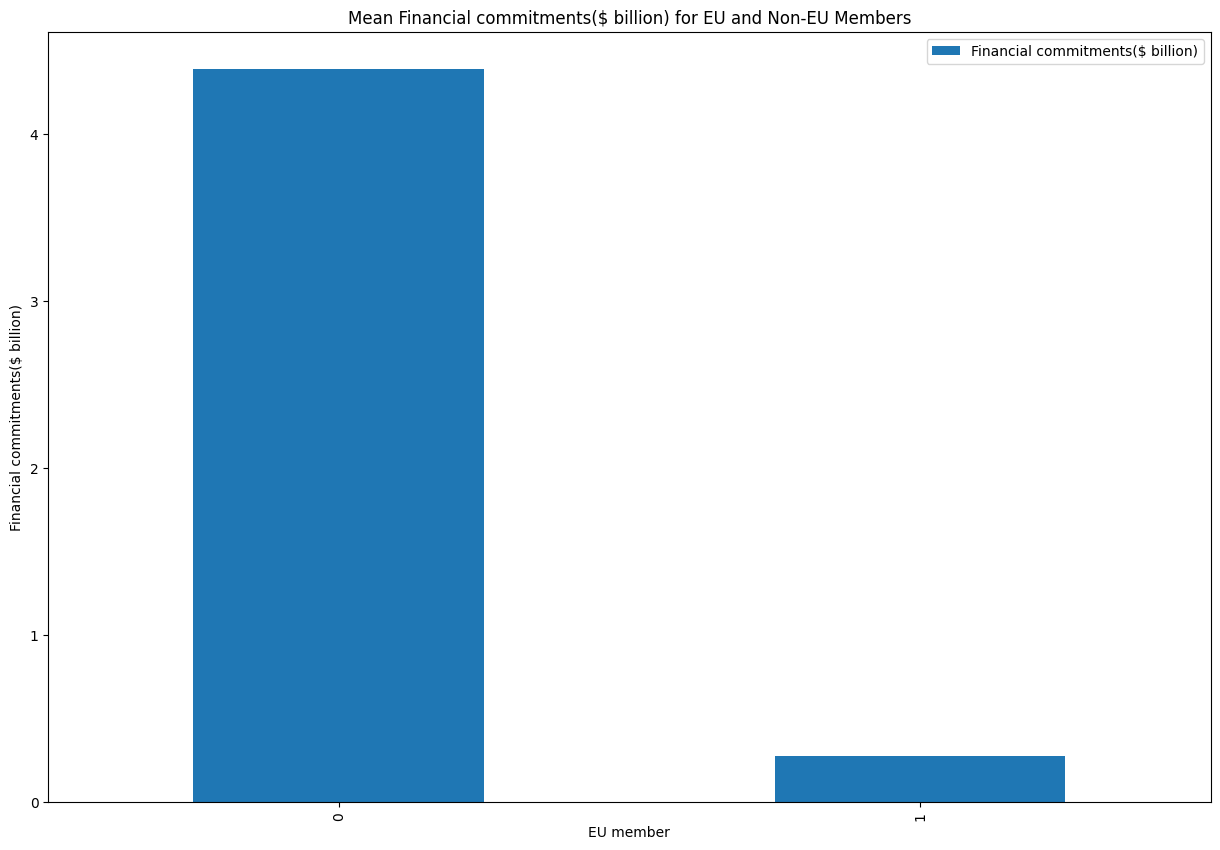

Financial commitments($ billion)
T-statistic: -2.8079681122658853
P-value: 0.008002213037017338
Reject H0. There is a significant difference in financial aids between EU members and non-EU members.


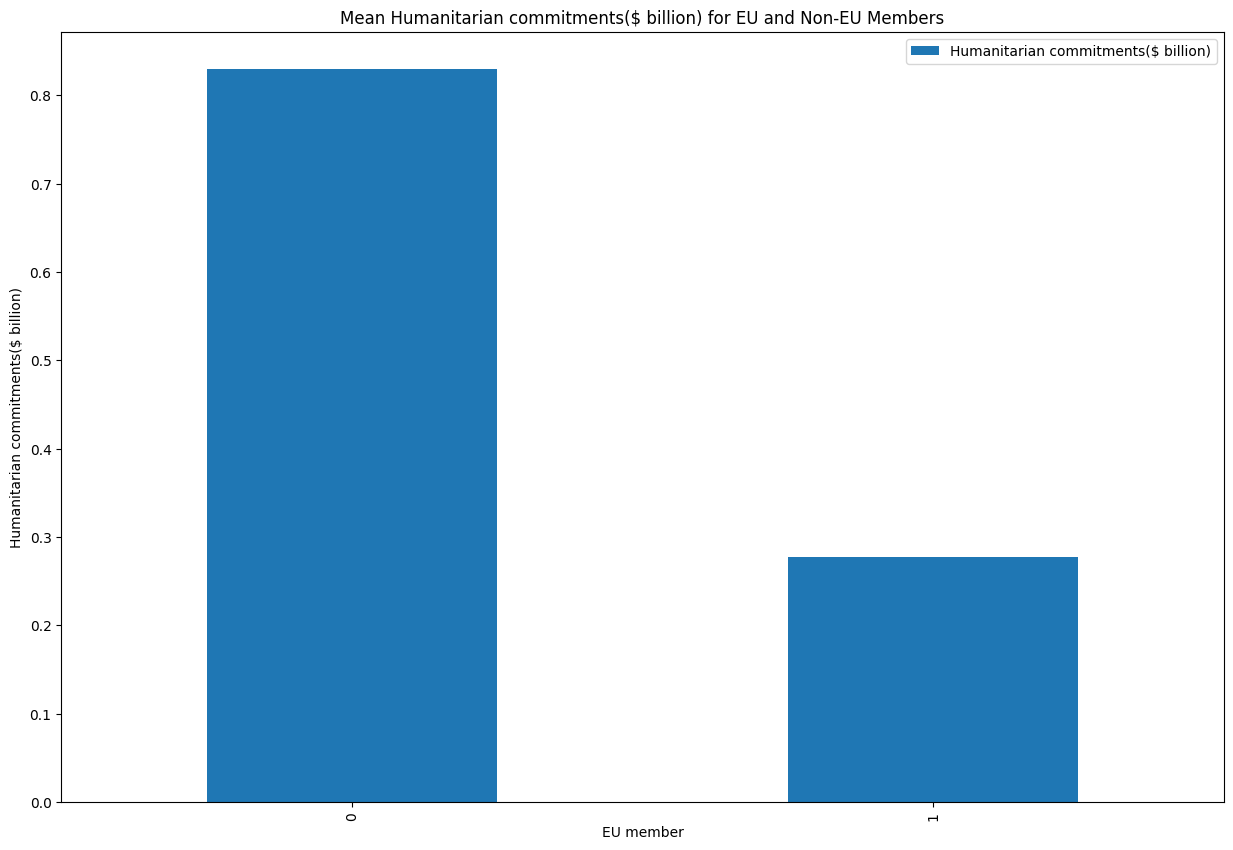

Humanitarian commitments($ billion)
T-statistic: -1.9995536483321144
P-value: 0.053138868182890736
H0 is not rejected. The statistical analysis did not provide sufficient evidence to conclude that there is a significant difference in financial aid between EU members and non-EU members.


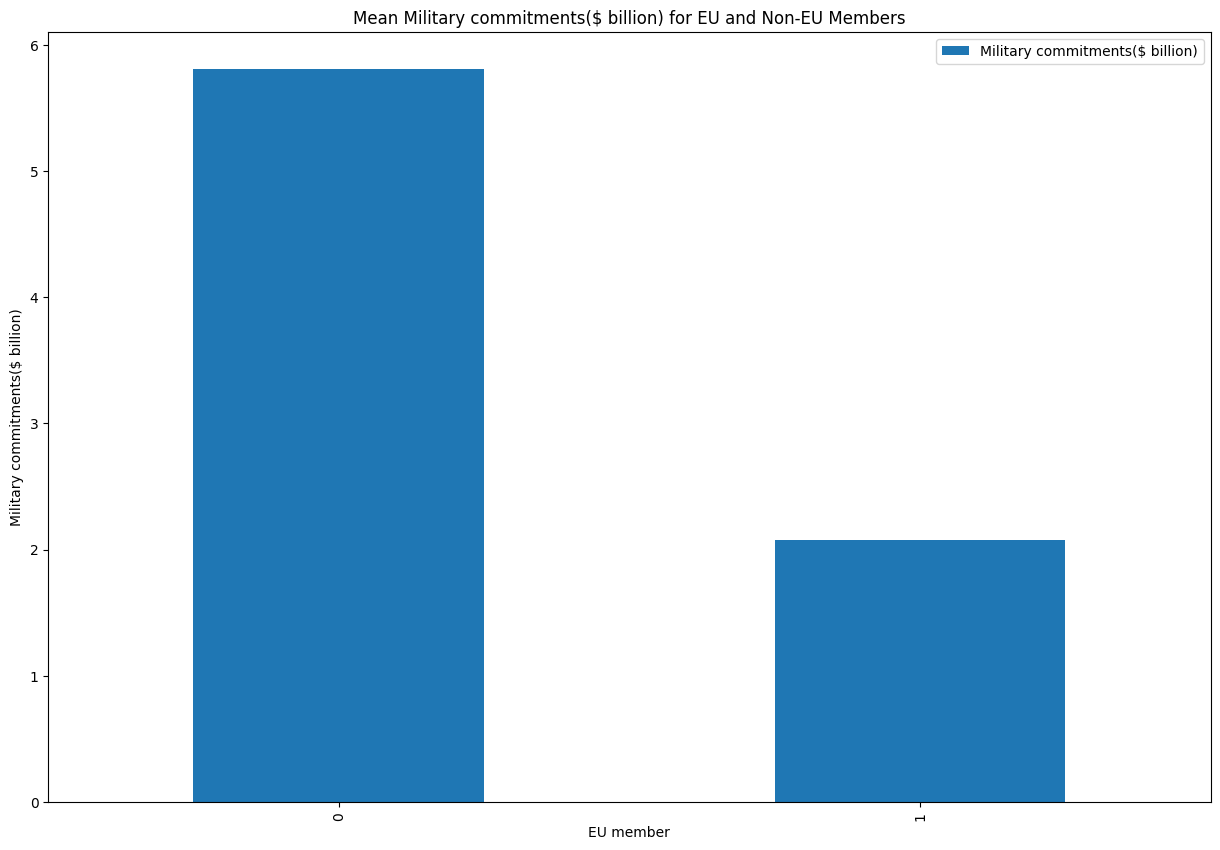

Military commitments($ billion)
T-statistic: -1.2922450155756195
P-value: 0.20450603255011132
H0 is not rejected. The statistical analysis did not provide sufficient evidence to conclude that there is a significant difference in financial aid between EU members and non-EU members.


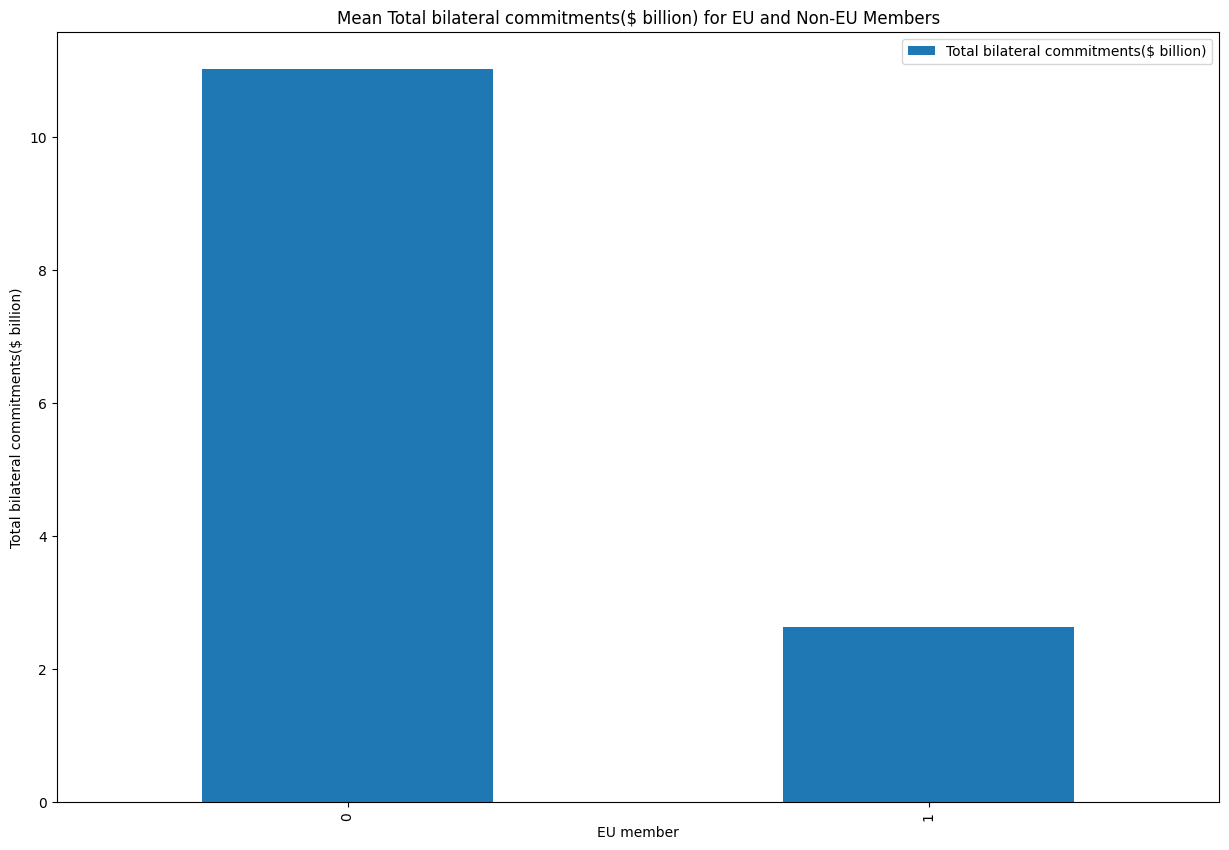

Total bilateral commitments($ billion)
T-statistic: -1.8985794977730588
P-value: 0.06565847917201009
H0 is not rejected. The statistical analysis did not provide sufficient evidence to conclude that there is a significant difference in financial aid between EU members and non-EU members.


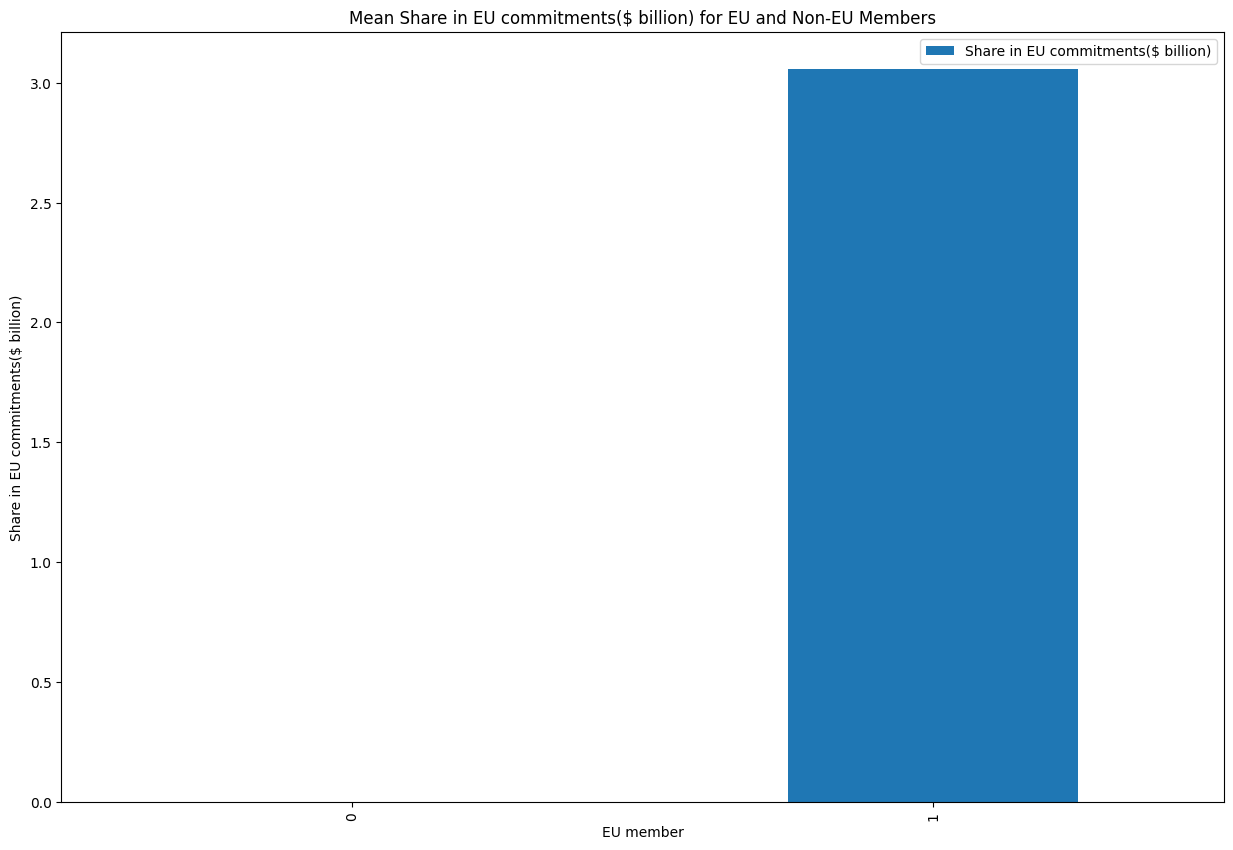

Share in EU commitments($ billion)
T-statistic: 2.0966470036371976
P-value: 0.04311428284004126
Reject H0. There is a significant difference in financial aids between EU members and non-EU members.


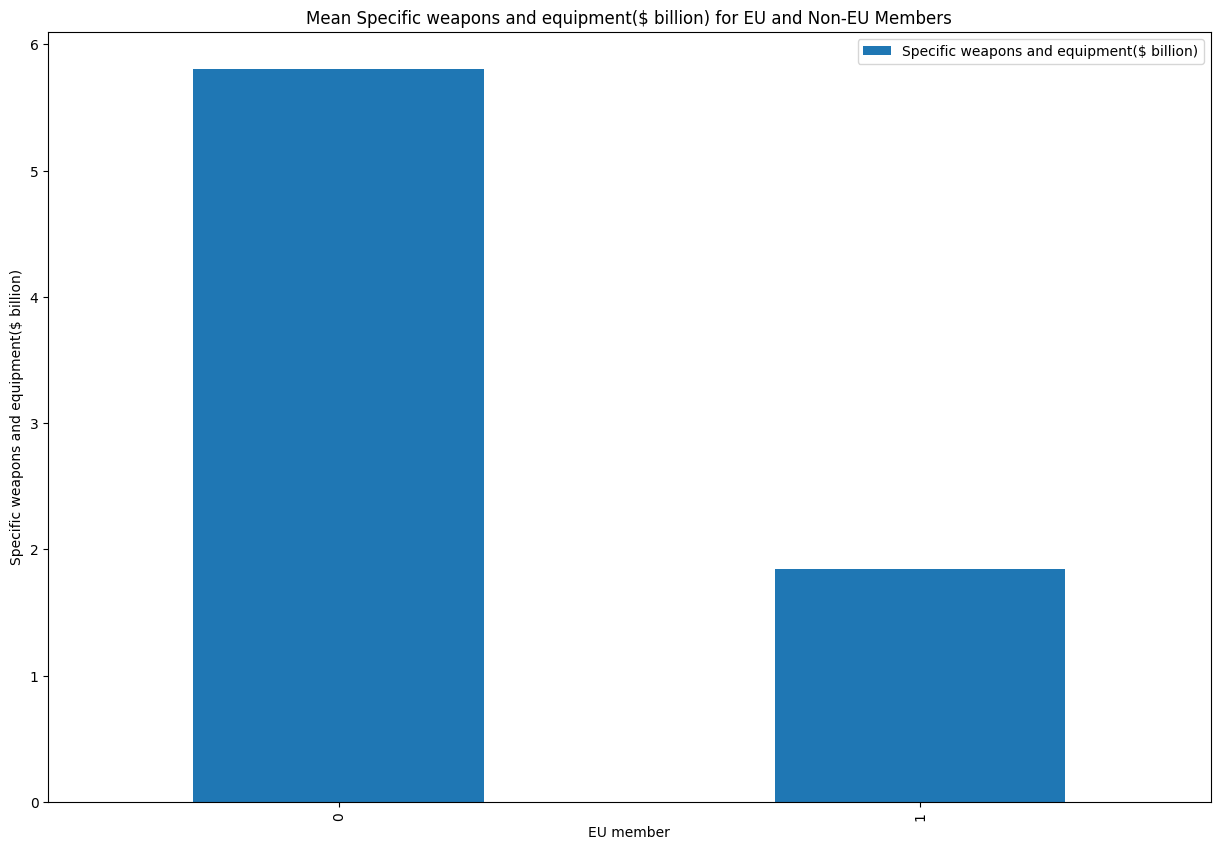

Specific weapons and equipment($ billion)
T-statistic: -1.3722044291480406
P-value: 0.17849008728029198
H0 is not rejected. The statistical analysis did not provide sufficient evidence to conclude that there is a significant difference in financial aid between EU members and non-EU members.


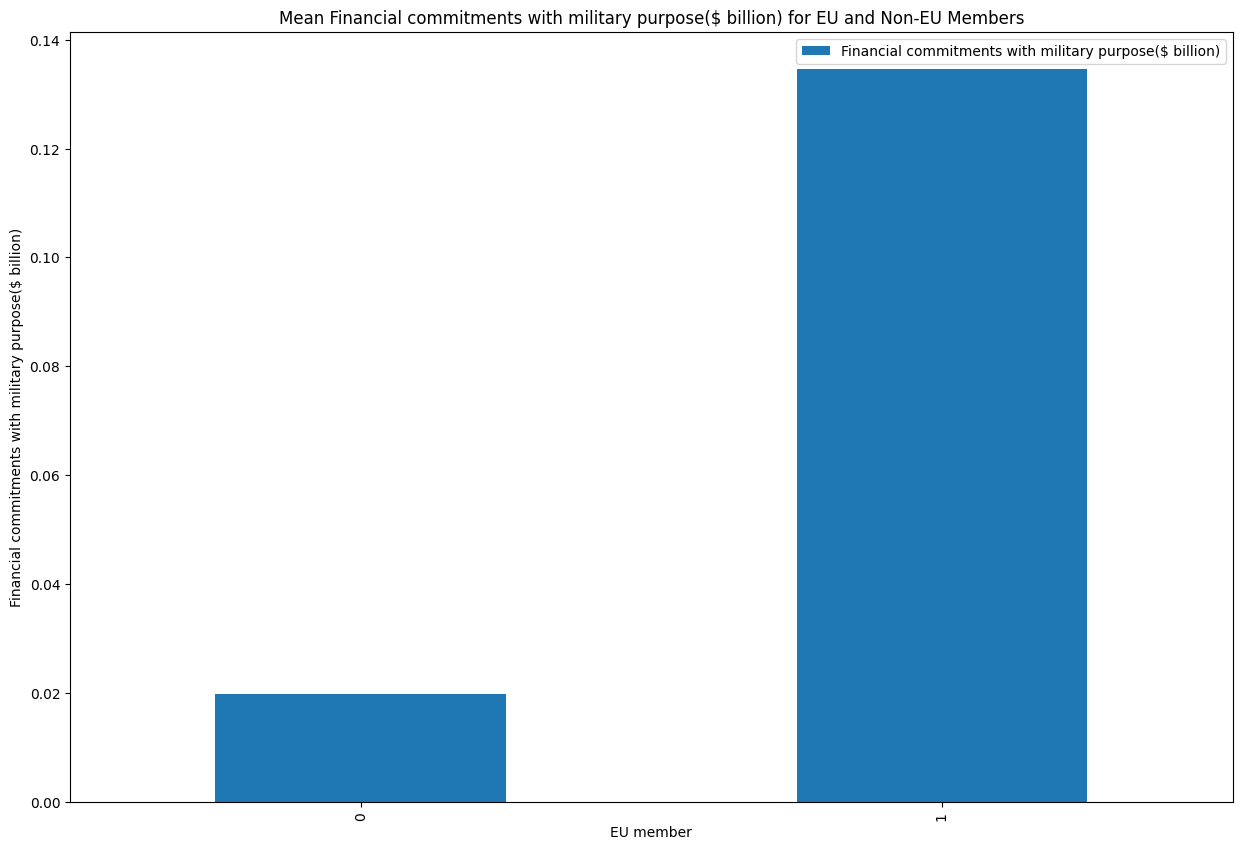

Financial commitments with military purpose($ billion)
T-statistic: 1.0227891650129377
P-value: 0.3132317013570656
H0 is not rejected. The statistical analysis did not provide sufficient evidence to conclude that there is a significant difference in financial aid between EU members and non-EU members.


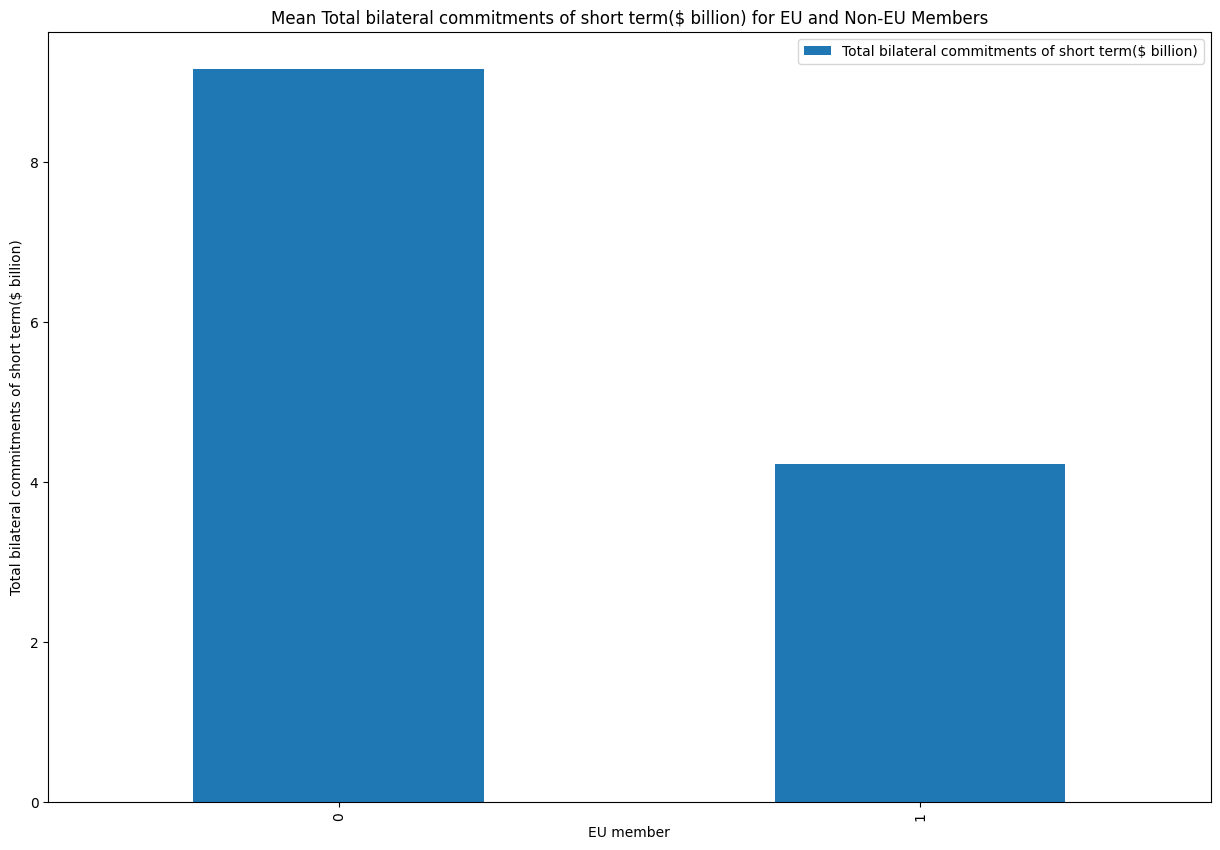

Total bilateral commitments of short term($ billion)
T-statistic: -0.9837450381138135
P-value: 0.33180654633734097
H0 is not rejected. The statistical analysis did not provide sufficient evidence to conclude that there is a significant difference in financial aid between EU members and non-EU members.


In [103]:
for allocation in financialAllocation:

    meanAllocations = data.groupby('EU member')[allocation].mean().reset_index()
    meanAllocations.plot(x='EU member', y=allocation, kind='bar', figsize=(15, 10))
    plt.title(f'Mean {allocation} for EU and Non-EU Members')
    plt.ylabel(allocation)
    plt.show()
    
    eu_members = data[data['EU member'] == 1][allocation]
    non_eu_members = data[data['EU member'] == 0][allocation]
    
    t_stat, p_value = ttest_ind(eu_members, non_eu_members, nan_policy='omit')
    
    print(f"{allocation}")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    
    # Set the significance level
    alpha = 0.05
    
    if p_value < alpha:
        print("Reject H0. There is a significant difference in financial aids between EU members and non-EU members.")
    else:
        print("H0 is not rejected. The statistical analysis did not provide sufficient evidence to conclude that there is a significant difference in financial aid between EU members and non-EU members.")

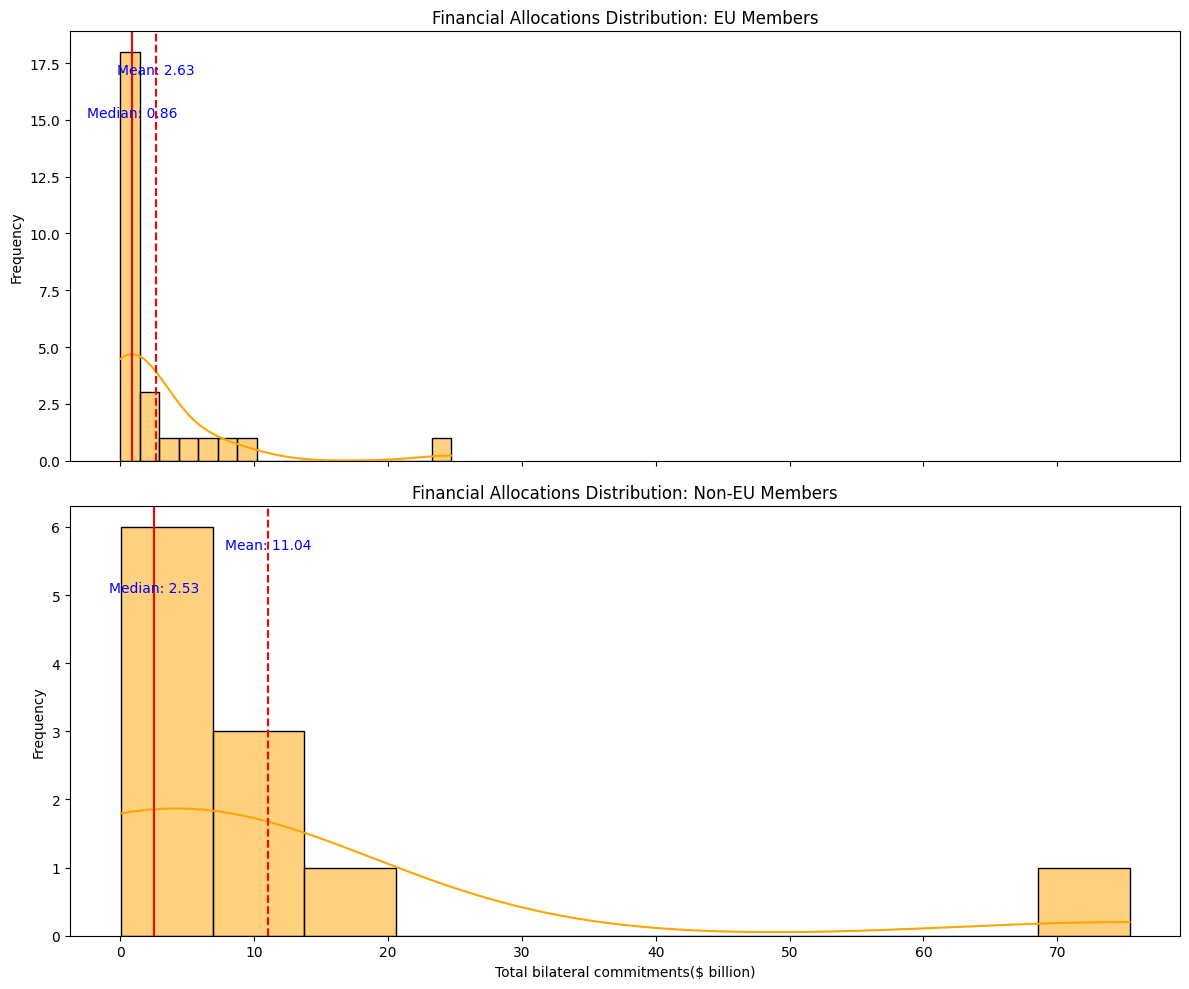

In [104]:
# Distribution plots for financial allocations of EU and non-EU members, showing mean and median values.


mean_eu = data[data['EU member'] == 1]['Total bilateral commitments($ billion)'].mean()
median_eu = data[data['EU member'] == 1]['Total bilateral commitments($ billion)'].median()
mean_non_eu = data[data['EU member'] == 0]['Total bilateral commitments($ billion)'].mean()
median_non_eu = data[data['EU member'] == 0]['Total bilateral commitments($ billion)'].median()

fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# EU Members
sns.histplot(data[data['EU member'] == 1]['Total bilateral commitments($ billion)'], kde=True, color='orange', ax=ax[0])
ax[0].axvline(mean_eu, color='red', linestyle='--')
ax[0].axvline(median_eu, color='red', linestyle='-')
ax[0].text(mean_eu, ax[0].get_ylim()[1] * 0.9, f'Mean: {mean_eu:.2f}', color='blue', ha='center')
ax[0].text(median_eu, ax[0].get_ylim()[1] * 0.8, f'Median: {median_eu:.2f}', color='blue', ha='center')
ax[0].set_title('Financial Allocations Distribution: EU Members')
ax[0].set_xlabel('Total bilateral commitments($ billion)')
ax[0].set_ylabel('Frequency')

# Non-EU Members
sns.histplot(data[data['EU member'] == 0]['Total bilateral commitments($ billion)'], kde=True, color='orange', ax=ax[1])
ax[1].axvline(mean_non_eu, color='red', linestyle='--')
ax[1].axvline(median_non_eu, color='red', linestyle='-')
ax[1].text(mean_non_eu, ax[1].get_ylim()[1] * 0.9, f'Mean: {mean_non_eu:.2f}', color='blue', ha='center')
ax[1].text(median_non_eu, ax[1].get_ylim()[1] * 0.8, f'Median: {median_non_eu:.2f}', color='blue', ha='center')
ax[1].set_title('Financial Allocations Distribution: Non-EU Members')
ax[1].set_xlabel('Total bilateral commitments($ billion)')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


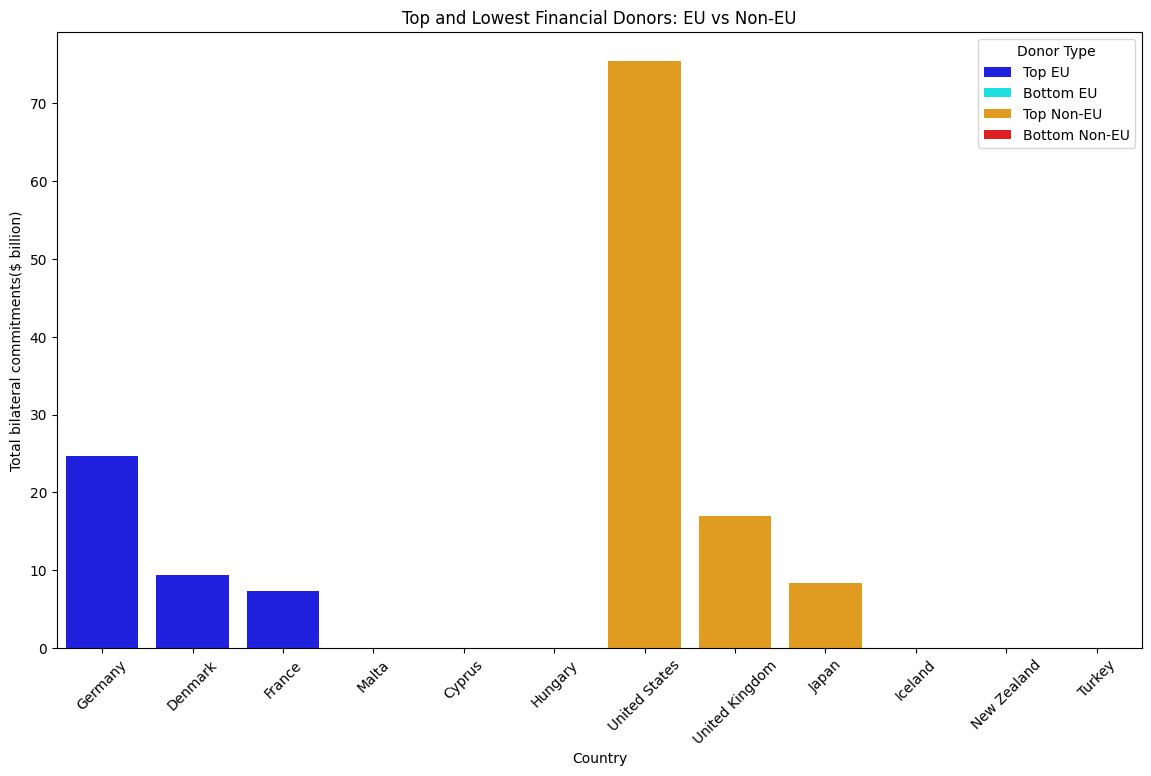

In [105]:
# Visualization of top and lowest financial donors, comparing EU and non-EU members.


top_eu_donors = data[data['EU member'] == 1].nlargest(3, 'Total bilateral commitments($ billion)')
bot_eu_donors = data[data['EU member'] == 1].nsmallest(3, 'Total bilateral commitments($ billion)')
top_non_eu_donors= data[data['EU member'] == 0].nlargest(3, 'Total bilateral commitments($ billion)')
bot_non_eu_donors = data[data['EU member'] == 0].nsmallest(3, 'Total bilateral commitments($ billion)')

donors = pd.concat([top_eu_donors, bot_eu_donors, top_non_eu_donors, bot_non_eu_donors])
donors['Donor Type'] = ['Top EU'] * 3 + ['Bottom EU'] * 3 + ['Top Non-EU'] * 3 + ['Bottom Non-EU'] * 3

plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='Total bilateral commitments($ billion)', hue='Donor Type', data=donors, palette=['blue', 'cyan', 'orange', 'red'])
plt.title('Top and Lowest Financial Donors: EU vs Non-EU')
plt.xlabel('Country')
plt.ylabel('Total bilateral commitments($ billion)')
plt.xticks(rotation=45)
plt.legend(title='Donor Type', loc='upper right')
plt.show()

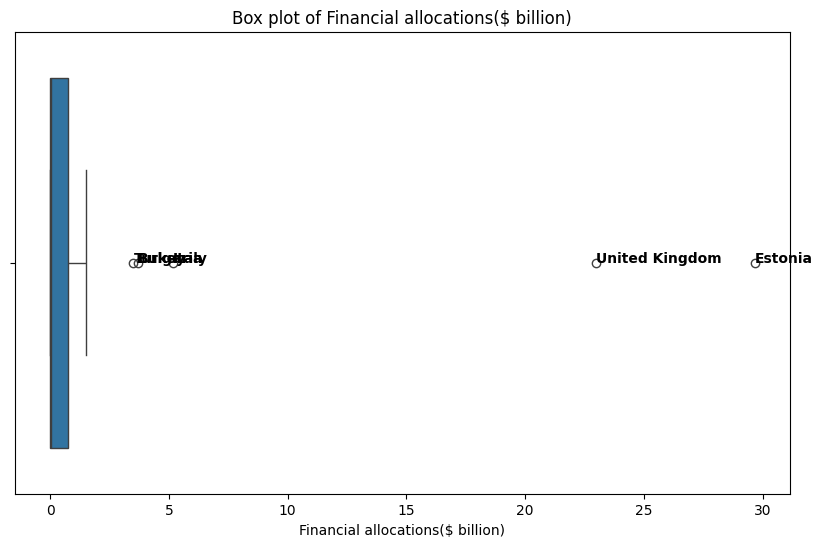

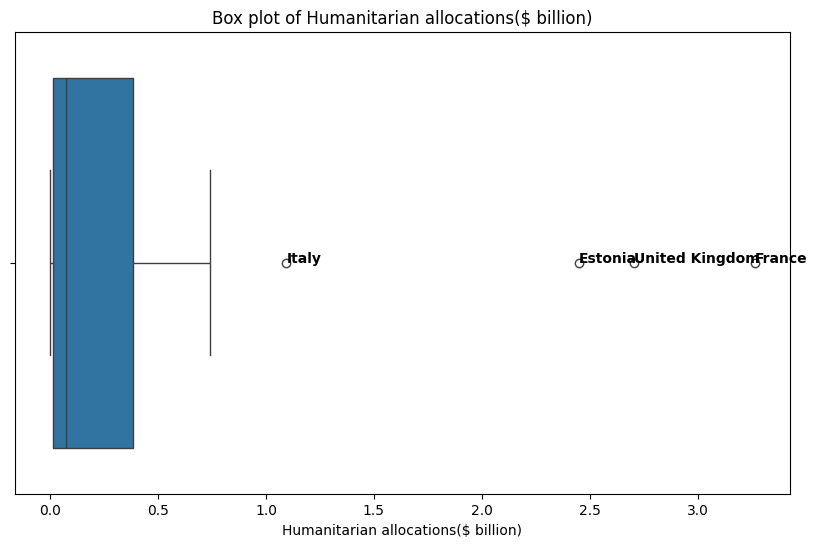

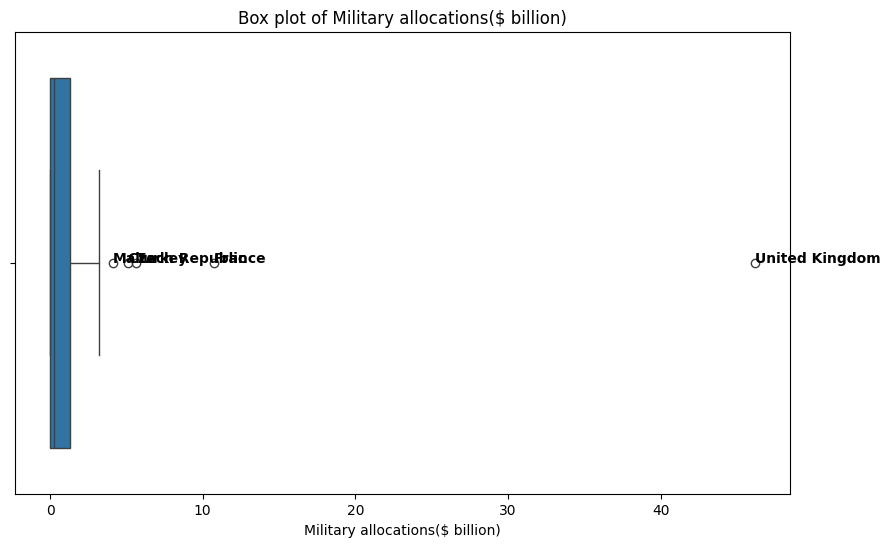

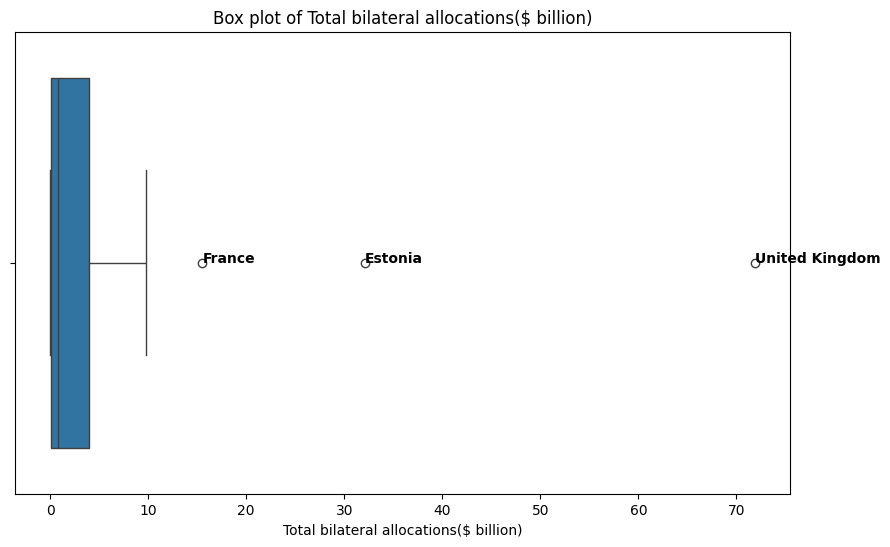

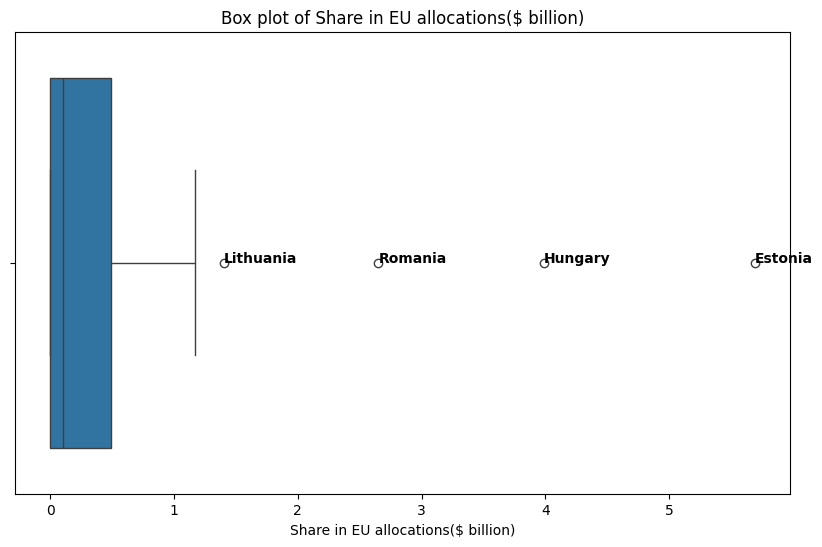

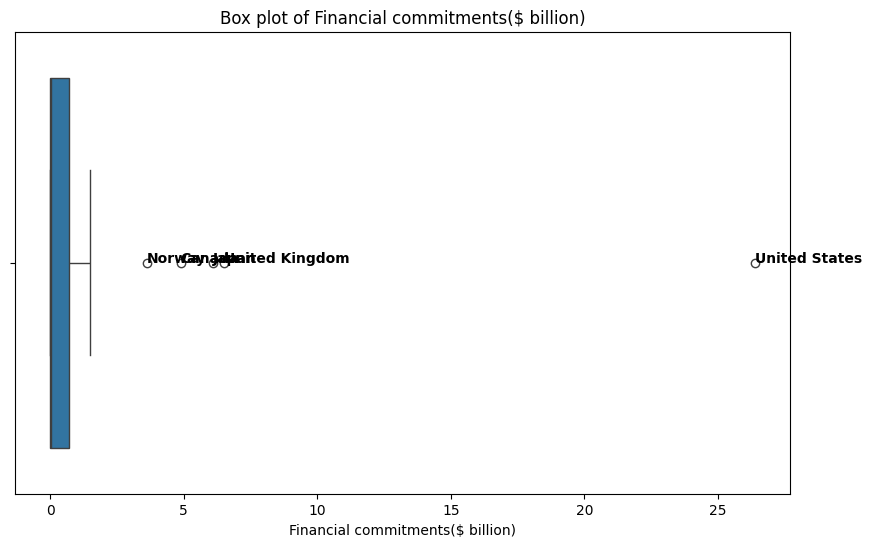

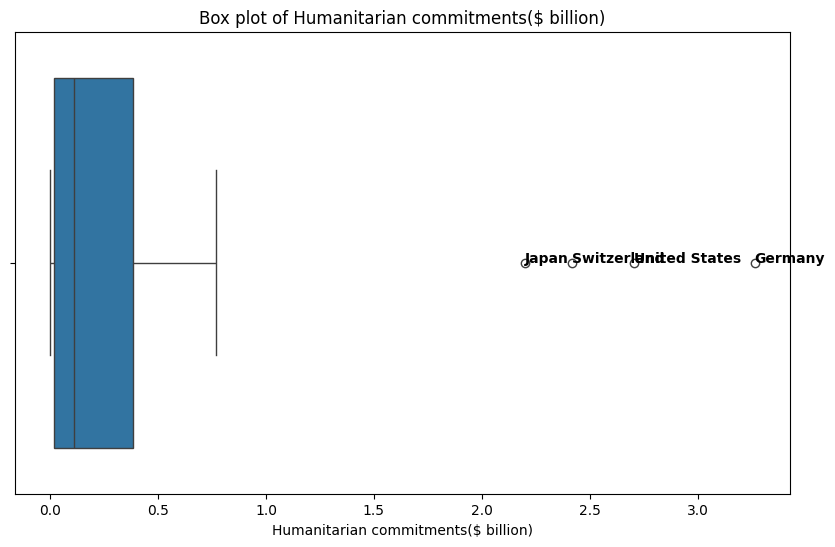

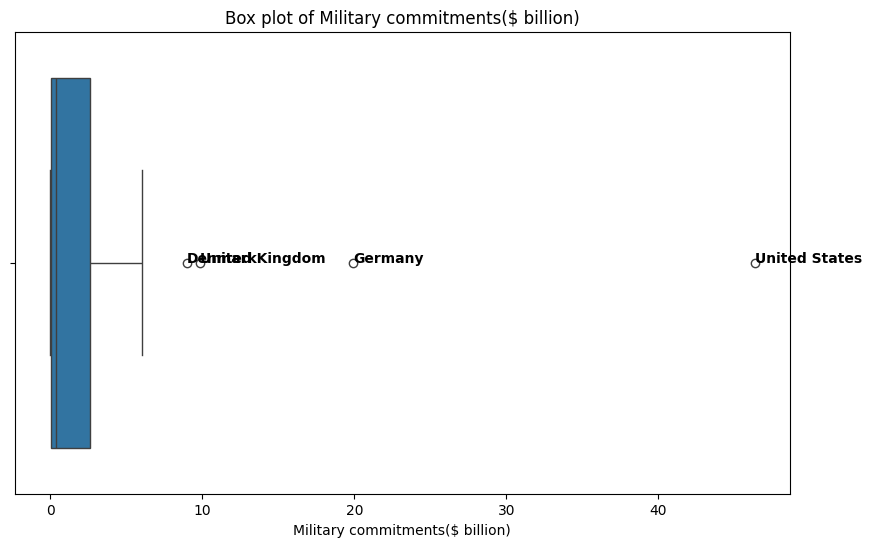

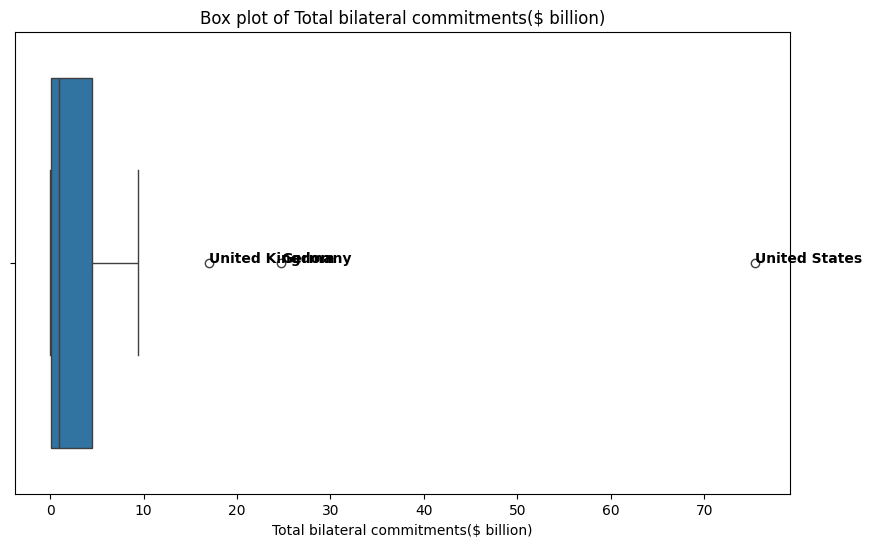

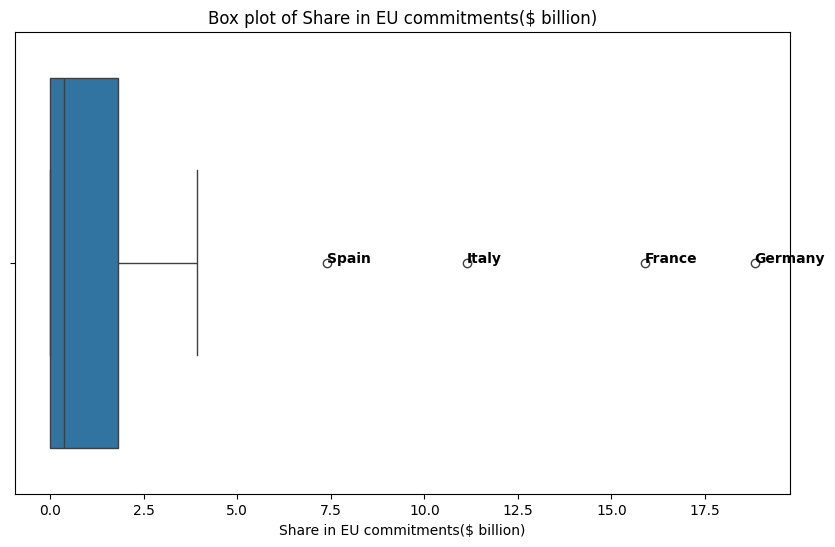

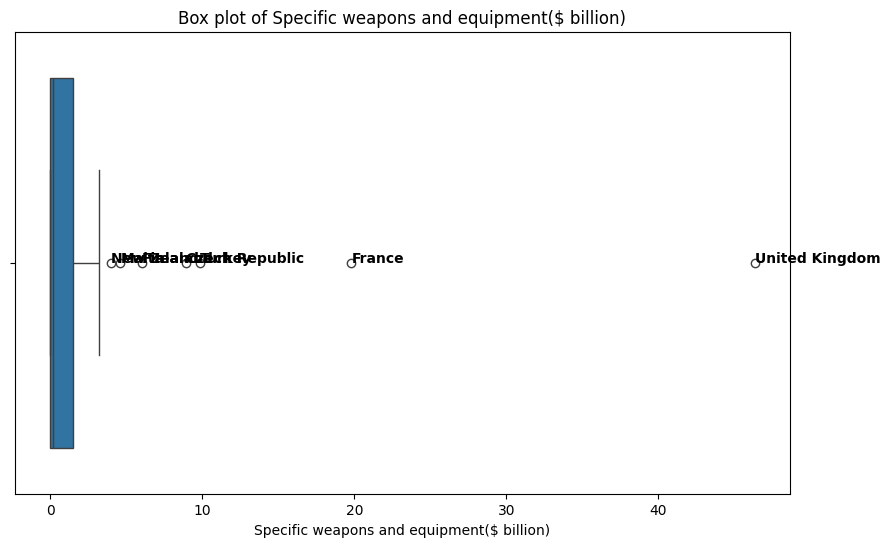

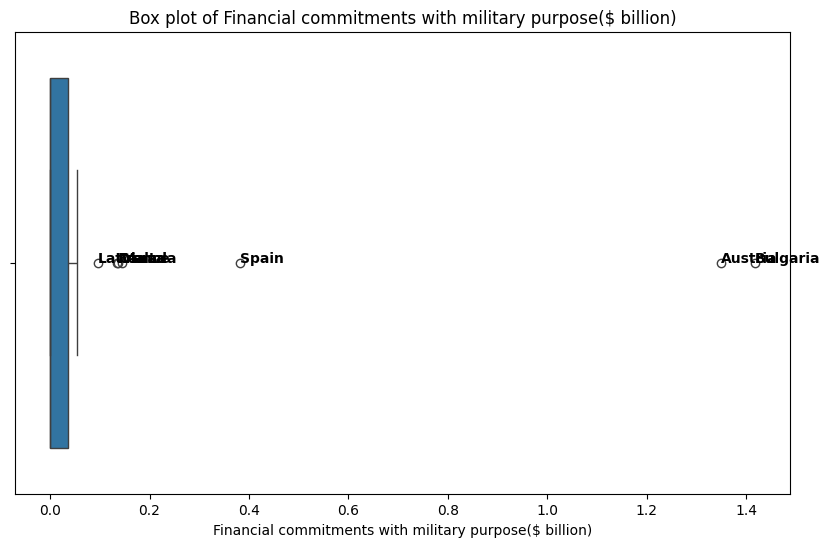

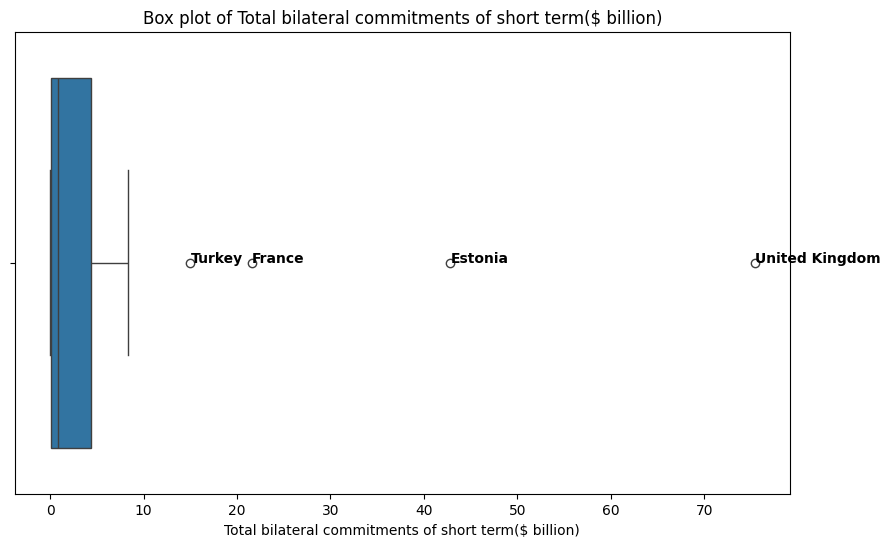

                                                    Financial allocations($ billion)  \
Financial allocations($ billion)                                            1.000000   
Humanitarian allocations($ billion)                                         0.723607   
Military allocations($ billion)                                             0.559340   
Total bilateral allocations($ billion)                                      0.855524   
Share in EU allocations($ billion)                                          0.506238   
Financial commitments($ billion)                                            0.051202   
Humanitarian commitments($ billion)                                        -0.049075   
Military commitments($ billion)                                             0.026399   
Total bilateral commitments($ billion)                                      0.031580   
Share in EU commitments($ billion)                                         -0.067427   
Specific weapons and equipment($

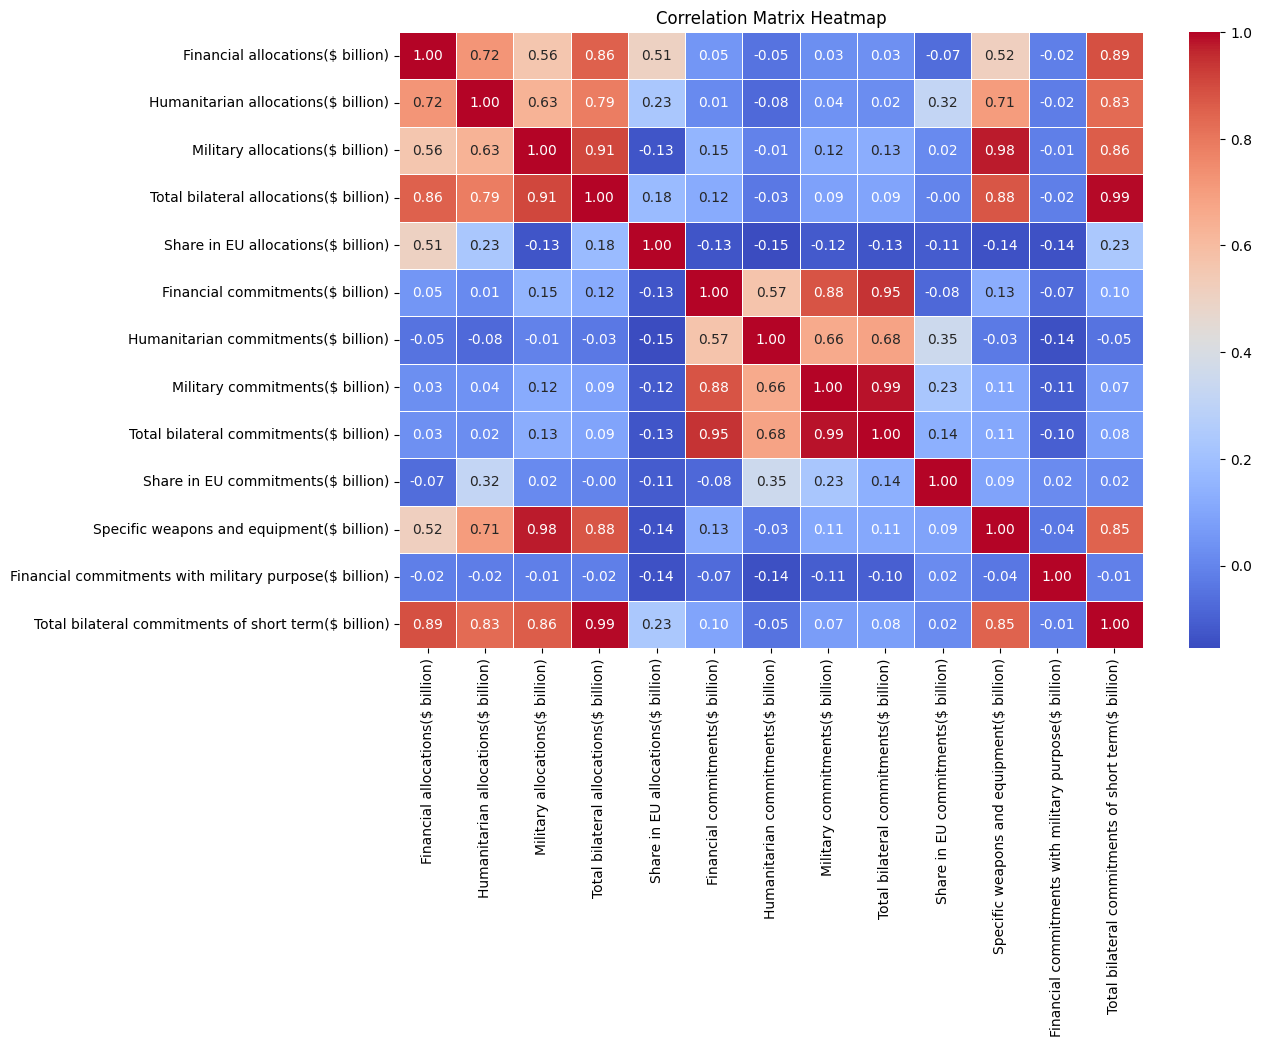

In [106]:
# Visualization of combined Financial allocations with outliers

def outliers(ax, column, country_col='Country'):
    Q1 = data[column].quantile(0.25)  
    Q3 = data[column].quantile(0.75) 
    IQR = Q3 - Q1                    
    lowerBound = Q1 - 1.5 * IQR       
    upperBound = Q3 + 1.5 * IQR       
    outliers = data[(data[column] < lowerBound) | (data[column] > upperBound)] 


    for i in range(outliers.shape[0]):
        country_name = outliers[country_col].iloc[i]  
        ax.text(outliers[column].iloc[i], 0, country_name,
                horizontalalignment='left', size='medium', color='black', weight='semibold')

for column in financialAllocation:
    plt.figure(figsize=(10, 6))  
    ax = sns.boxplot(x=data[column]) 
    plt.title(f'Box plot of {column}')  
    plt.xlabel(column) 
    outliers(ax, column, country_col='Country')  
    plt.show()  

# Correlation matrix between financial allocations and commitments.
correlation_matrix = data[financialAllocation].corr()

print(correlation_matrix)
plt.figure(figsize=(12, 8))  
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5) 
plt.title('Correlation Matrix Heatmap') 
plt.show() 

In [107]:
# Total commitments

totalComitments = data['Total Commitments($ billion)'] = (
    data['Financial commitments($ billion)'] +
    data['Humanitarian commitments($ billion)'] +
    data['Military commitments($ billion)'] +
    data['Total bilateral commitments($ billion)'] +
    data['Share in EU commitments($ billion)'] +
    data['Specific weapons and equipment($ billion)'] +
    data['Financial commitments with military purpose($ billion)'] +
    data['Total bilateral commitments of short term($ billion)'] +
    data['Financial allocations($ billion)'] +
    data['Humanitarian allocations($ billion)'] +
    data['Military allocations($ billion)'] +
    data['Total bilateral allocations($ billion)'] +
    data['Share in EU allocations($ billion)']
)

In [108]:
# Total commitments per GDP

data['Commitments per GDP'] = data['Total Commitments($ billion)'] / data['GDP in 2021($ billion)']

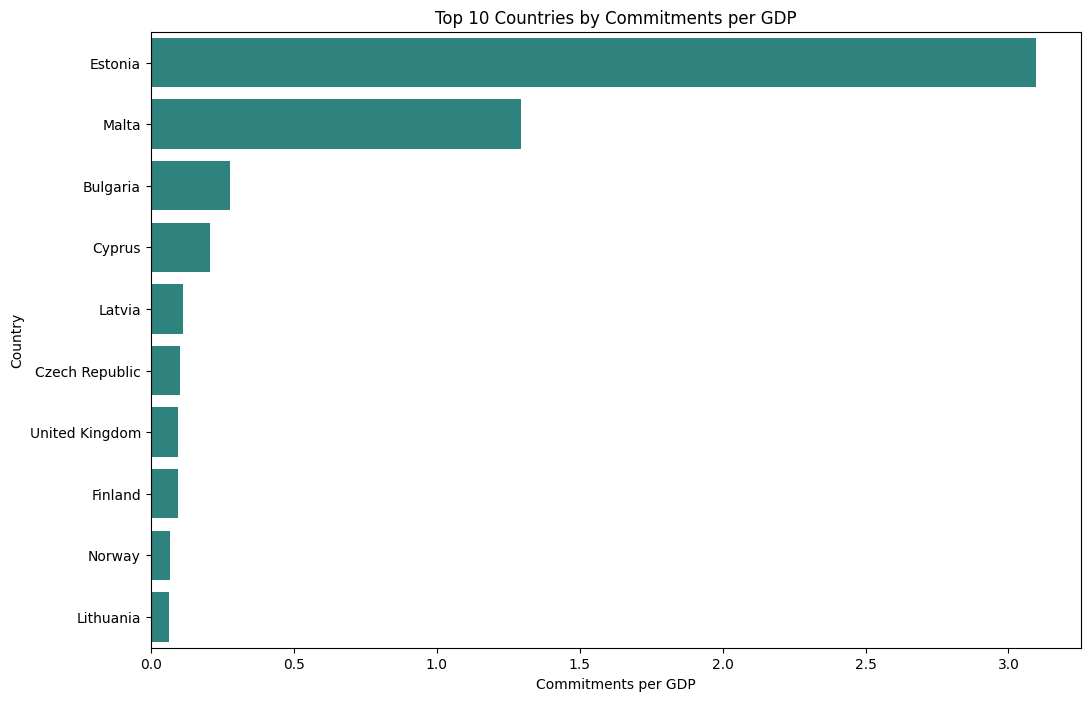

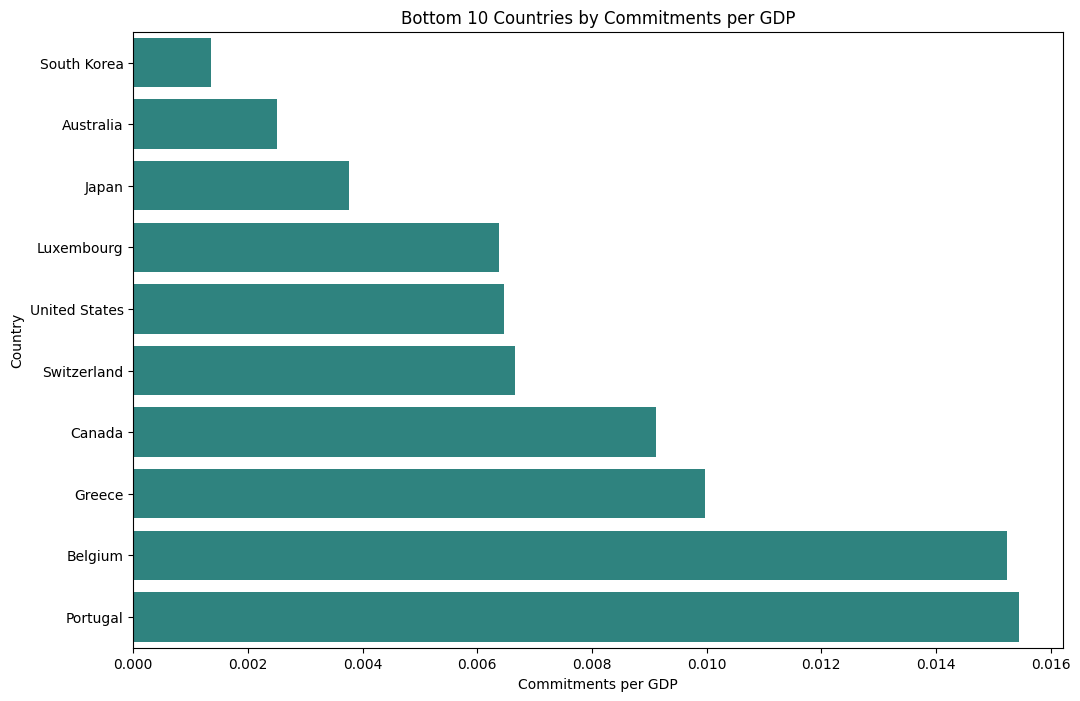

In [109]:
# Top 10 countries by largest commitments per GDP
top_countries = data.nlargest(10, 'Commitments per GDP')

top_countries['constant'] = 'constant'

plt.figure(figsize=(12, 8))
sns.barplot(x='Commitments per GDP', y='Country', hue='constant', data=top_countries, palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Countries by Commitments per GDP')
plt.xlabel('Commitments per GDP')
plt.ylabel('Country')
plt.show()


bottom_countries = data.nsmallest(10, 'Commitments per GDP')

bottom_countries['constant'] = 'constant'

plt.figure(figsize=(12, 8))
sns.barplot(x='Commitments per GDP', y='Country', hue='constant', data=bottom_countries, palette='viridis', dodge=False, legend=False)
plt.title('Bottom 10 Countries by Commitments per GDP')
plt.xlabel('Commitments per GDP')
plt.ylabel('Country')
plt.show()